In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#HOW DO I MAKE MY PANDAS DataFrame smaller and faster

In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [6]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [7]:
drinks.memory_usage()

Index                            128
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [8]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [9]:
drinks.memory_usage(deep=True).sum()

31224

In [10]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [11]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [12]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [14]:
#turning data type of continent into category
drinks['continent'] = drinks.continent.astype('category')

In [15]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [16]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [17]:
#momory of continent will decrease
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [18]:
#decreasing country column memory size
drinks['country'] = drinks.country.astype('category')

In [19]:
drinks.memory_usage()

Index                            128
country                         7050
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                        401
dtype: int64

In [20]:
#making a new DataFrame

In [21]:
df = pd.DataFrame({'ID':[101,102,103,104], 'quality':['good','very good','good','excellent']})

In [22]:
df

,ID,quality
0,101,good
1,102,very good
2,103,good
3,104,excellent


In [23]:
df.memory_usage()

Index      128
ID          32
quality     32
dtype: int64

In [24]:
df['quality'] = df.quality.astype('category')

In [25]:
df.memory_usage(deep=True)

Index      128
ID          32
quality    277
dtype: int64

In [26]:
#HOW DO I USE PANDAS WITH scikit-learn to create Kaggle submissions

In [27]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
feature_cols = ['Pclass', 'Parch']

In [30]:
X = train.loc[:,feature_cols]

In [31]:
X.shape

(891, 2)

In [32]:
y = train.Survived

In [33]:
y.shape

(891,)

In [34]:
#defining machine learning algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
test = pd.read_csv('http://bit.ly/kaggletest')

In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
X_new = test.loc[:,feature_cols]

In [38]:
X_new.shape

(418, 2)

In [39]:
y_model = model.predict(X_new)

In [40]:
y_model.shape

(418,)

In [41]:
y_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [43]:
pd.DataFrame({'PassengerID':test.PassengerId, 'Survived':y_model}).set_index('PassengerID')

,Survived
PassengerID,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [44]:
pd.DataFrame({'PassengerID':test.PassengerId, 'Survived':y_model}).set_index('PassengerID').to_csv('sub.csv')

In [46]:
#saving dataset
train.to_pickle('train.pkl')

In [48]:
#reading dataset
pd.read_pickle('train.pkl').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#HOW TO READ THE PANDAS DOCS

In [50]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [51]:
ufo.shape

(18241, 5)

In [52]:
pd.isnull(ufo).head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [53]:
#same thing
ufo.isnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [54]:
ufo.loc[0:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [55]:
ufo.iloc[0:4,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [56]:
ufo.values

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ...,
       ['Eagle River', nan, nan, 'WI', '12/31/2000 23:45'],
       ['Eagle River', 'RED', 'LIGHT', 'WI', '12/31/2000 23:45'],
       ['Ybor', nan, 'OVAL', 'FL', '12/31/2000 23:59']], dtype=object)

In [57]:
#use of values
ufo.values[0:4,:]

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ['Abilene', nan, 'DISK', 'KS', '6/1/1931 13:00']], dtype=object)

In [58]:
#use of sample
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
16279,Culver City,NaN,LIGHT,CA,4/19/2000 20:20
10538,Granite City,BLUE,LIGHT,IL,7/4/1997 22:00
589,Great Bend,NaN,OTHER,KS,6/1/1960 0:00


In [59]:
#random_state print the same value every time
ufo.sample(n=3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [61]:
#frac means percentage of the total number of the rows
ufo.sample(frac=.0002, random_state=99)

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00


In [63]:
#making dataset for machine learning algorithm and test from ufo dataset
train = ufo.sample(frac=.75, random_state=99)
test = ufo.loc[~ufo.index.isin(train.index), :]

In [64]:
#HOW DO I CREATE DUMMY VARIABLES IN PANDAS

In [65]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [66]:
train.shape

(891, 12)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#use of map in dataset
train['Sex_male'] = train.Sex.map({'male':1, 'female':0})

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [72]:
#use of get_dummies
pd.get_dummies(train.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [73]:
pd.get_dummies(train.Sex).iloc[:,1:]

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [74]:
pd.get_dummies(train.Sex, prefix='Sex').iloc[:,1:]

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [75]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [76]:
#use of get_dummies in Embarked
pd.get_dummies(train.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [77]:
pd.get_dummies(train.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [78]:
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:]

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [80]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:]

In [81]:
train = pd.concat([train, embarked_dummies])

/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
train.head()

,Age,Cabin,Embarked,Embarked_Q,Embarked_S,Fare,Name,Parch,PassengerId,Pclass,Sex,Sex_male,SibSp,Survived,Ticket
0,22.0,NaN,S,NaN,NaN,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,1.0,0.0,A/5 21171
1,38.0,C85,C,NaN,NaN,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,0.0,1.0,1.0,PC 17599
2,26.0,NaN,S,NaN,NaN,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,0.0,1.0,STON/O2. 3101282
3,35.0,C123,S,NaN,NaN,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,female,0.0,1.0,1.0,113803
4,35.0,NaN,S,NaN,NaN,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,male,1.0,0.0,0.0,373450


In [83]:
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

,Age,Cabin,Embarked_Q,Embarked_S,Fare,Name,Parch,PassengerId,Pclass,Sex_male,SibSp,Survived,Ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,NaN,NaN,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,1.0,1.0,0.0,A/5 21171,0,1,0,0,1
1,38.0,C85,NaN,NaN,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,0.0,1.0,1.0,PC 17599,1,0,1,0,0
2,26.0,NaN,NaN,NaN,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,0.0,0.0,1.0,STON/O2. 3101282,1,0,0,0,1
3,35.0,C123,NaN,NaN,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,0.0,1.0,1.0,113803,1,0,0,0,1
4,35.0,NaN,NaN,NaN,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,1.0,0.0,0.0,373450,0,1,0,0,1


In [85]:
#use of drop_first boolean parameter
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()

,Age,Cabin,Embarked_Q,Embarked_S,Fare,Name,Parch,PassengerId,Pclass,Sex_male,SibSp,Survived,Ticket,Sex_male,Embarked_Q,Embarked_S
0,22.0,NaN,NaN,NaN,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,1.0,1.0,0.0,A/5 21171,1,0,1
1,38.0,C85,NaN,NaN,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,0.0,1.0,1.0,PC 17599,0,0,0
2,26.0,NaN,NaN,NaN,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,0.0,0.0,1.0,STON/O2. 3101282,0,0,1
3,35.0,C123,NaN,NaN,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,0.0,1.0,1.0,113803,0,0,1
4,35.0,NaN,NaN,NaN,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,1.0,0.0,0.0,373450,1,0,1


In [86]:
#HOW DO I WORK WITH DATES AND TIMES IN PANDAS

In [87]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [88]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [89]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [90]:
#slicing time column
ufo.Time.str.slice(-5,-3).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: object

In [91]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [93]:
#dtypes of Times doesn't change
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [94]:
#use of to_datetime
ufo['Time'] = pd.to_datetime(ufo.Time)

In [95]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [96]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [97]:
#printing only hour
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [98]:
#printing only minute
ufo.Time.dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Time, dtype: int64

In [99]:
#printing week
ufo.Time.dt.week.head()

0    22
1    27
2     7
3    23
4    16
Name: Time, dtype: int64

In [101]:
#printing weekday
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [102]:
#printing dayofyear
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [103]:
ts = pd.to_datetime('1/1/1999')
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [104]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [105]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [106]:
#creating new column
ufo['Year'] = ufo.Time.dt.year

In [107]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [108]:
ufo.Year.value_counts().sort_values()

1933       1
1934       1
1935       1
1936       2
1941       2
        ... 
1997    1237
1995    1344
1998    1743
2000    2635
1999    2774
Name: Year, Length: 68, dtype: int64

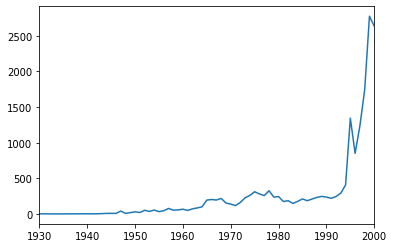

In [109]:
ufo.Year.value_counts().sort_index().plot()